<a href="https://colab.research.google.com/github/abood-W/ai_python/blob/main/car_prices_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import tensorflow as tf
from sklearn.impute import SimpleImputer

In [16]:
df = pd.read_csv('/content/imports-85.data', header=None)

In [17]:
column_names = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
    "length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
    "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
    "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"
]
df.columns = column_names
df.replace("?", np.nan, inplace=True)
num_cols = ["normalized_losses", "bore", "stroke", "horsepower", "peak_rpm", "price"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [18]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [19]:
X = df_encoded.drop("price", axis=1).values
y = df_encoded[["price"]].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 214125536.0000 - val_loss: 293318240.0000
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 204514480.0000 - val_loss: 293276000.0000
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 231155536.0000 - val_loss: 293229760.0000
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 208274880.0000 - val_loss: 293177472.0000
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 203794048.0000 - val_loss: 293114464.0000
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 206864992.0000 - val_loss: 293039296.0000
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 199356912.0000 - val_loss: 292947840.0000
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 204684544.0000 - val_loss: 292833120.0000
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 223693456.0000 - val_loss: 292692736.0000
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 208549008.0000 - val_loss: 292529408.0000

In [25]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 30569554.0000
Test Loss: 31374642.0


In [26]:
predictions = model.predict(X_test)
print(predictions[:40])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[25706.22  ]
 [17357.871 ]
 [ 2036.8522]
 [ 9340.426 ]
 [23515.545 ]
 [ 2845.8154]
 [ 3566.5251]
 [ 3197.433 ]
 [ 2921.042 ]
 [ 4173.2847]
 [ 9126.241 ]
 [ 2730.6309]
 [10203.47  ]
 [ 3231.648 ]
 [35599.727 ]
 [ 3650.1638]
 [ 2551.2642]
 [ 5354.0938]
 [ 2530.5803]
 [ 3891.3179]
 [ 3054.416 ]
 [14886.362 ]
 [ 2356.132 ]
 [ 5396.1   ]
 [ 3767.8494]
 [26808.984 ]
 [10368.723 ]
 [12299.857 ]
 [ 2295.5513]
 [14406.219 ]
 [24752.773 ]
 [ 3699.866 ]
 [ 2601.2864]
 [23764.516 ]
 [ 3993.268 ]
 [22058.082 ]
 [ 6122.442 ]
 [ 3518.1309]
 [ 4197.341 ]
 [ 5397.5903]]


In [28]:
# Scale the entire encoded dataset
X_scaled_all = scaler.transform(df_encoded.drop("price", axis=1).values)

# Make predictions on the entire dataset
all_predictions = model.predict(X_scaled_all)

# Create a DataFrame with original and predicted prices for all cars
df_all_predictions = pd.DataFrame({
    "original_price": df["price"].values,
    "predicted_price": all_predictions.flatten()
})

# Display the first 20 rows of the results
print(df_all_predictions.head(20))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
    original_price  predicted_price
0     13495.000000      9840.889648
1     16500.000000      9840.889648
2     16500.000000     13861.475586
3     13950.000000      7397.639160
4     17450.000000     17765.578125
5     15250.000000     13824.045898
6     17710.000000     18801.736328
7     18920.000000     16302.406250
8     23875.000000     21727.363281
9     13207.129353     17357.871094
10    16430.000000     13359.478516
11    16925.000000     12814.210938
12    20970.000000     19266.046875
13    21105.000000     19203.306641
14    24565.000000     21154.257812
15    30760.000000     25706.220703
16    41315.000000     26808.984375
17    36880.000000     29558.796875
18     5151.000000      2551.264160
19     6295.000000      2599.245850


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

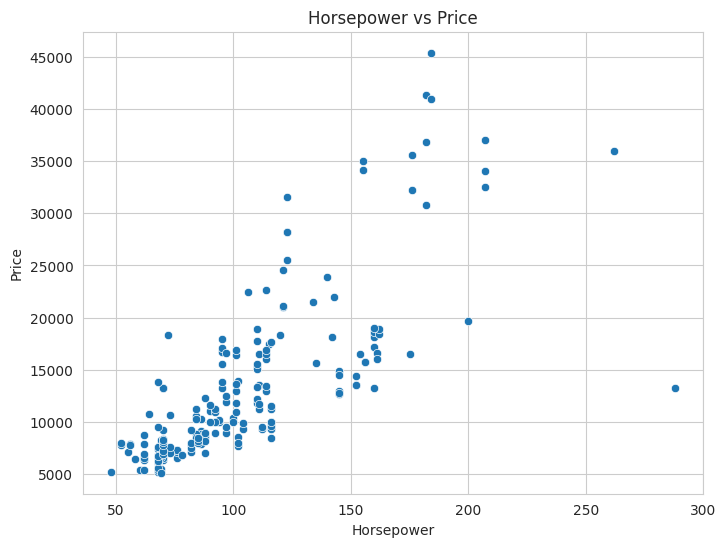

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['horsepower'], y=df['price'])
plt.title("Horsepower vs Price")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.grid(True)
plt.show()

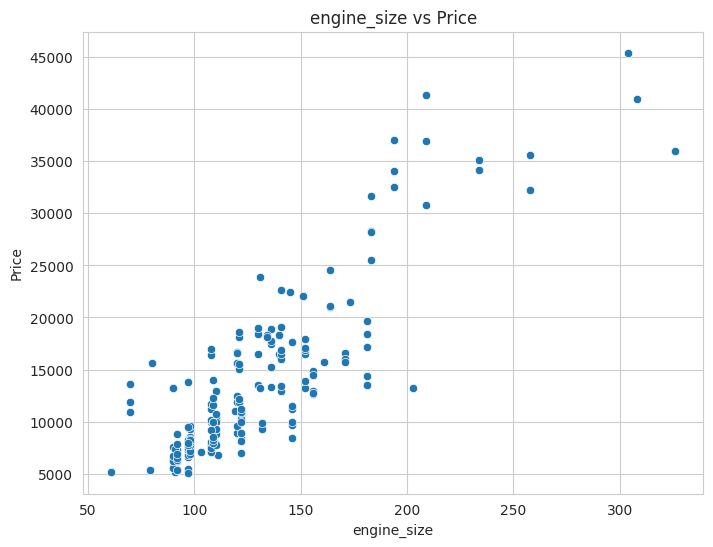

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['engine_size'], y=df['price'])
plt.title("engine_size vs Price")
plt.xlabel("engine_size")
plt.ylabel("Price")
plt.grid(True)
plt.show()

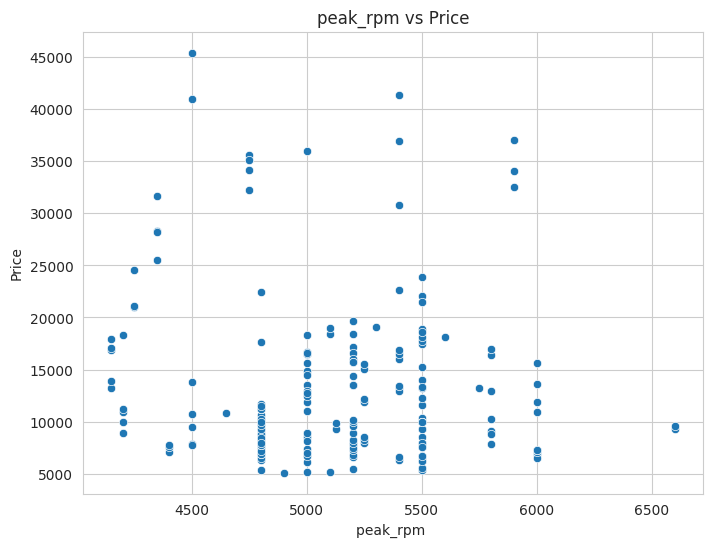

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['peak_rpm'], y=df['price'])
plt.title("peak_rpm vs Price")
plt.xlabel("peak_rpm ")
plt.ylabel("Price")
plt.grid(True)
plt.show()